In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import math

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [3]:
merge = pd.read_csv('merge_drop.csv', index_col = 0).reset_index().drop(['index'], axis = 1)

In [4]:
merge

,base_date,emd_nm,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,...,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
0,2018-01-01,건입동,1708250,1.700693e+05,18974.2767,182005.7196,66.0400,4389.1423,3.9559,4471.0154,...,34,589,5,152,44,49,10,93,751,0
1,2018-01-01,남원읍,1239600,2.844582e+05,17722.5033,213841.0388,34.4275,2025.4415,0.0000,6943.3756,...,54,466,25,295,34,15,5,93,481,5
2,2018-01-01,노형동,9357900,1.171498e+06,71832.9032,424610.4374,117.6627,10849.9819,476.9493,40893.5259,...,216,4905,123,943,363,236,54,987,3658,15
3,2018-01-01,대륜동,1717700,2.647160e+05,19962.1370,208720.9279,74.6425,2145.7763,210.6290,1720.2115,...,29,859,20,142,64,34,15,167,574,0
4,2018-01-01,대정읍,1264950,3.631059e+05,15910.1806,154216.7805,155.0755,3992.3257,453.0044,16733.5733,...,44,864,34,74,69,79,0,137,535,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48416,2021-06-30,표선면,1377450,2.392844e+05,23520.9584,158051.6026,57.3384,2546.3164,137.6136,3722.4027,...,35,423,75,236,20,35,10,45,397,0
48417,2021-06-30,한경면,973850,1.674179e+05,16029.6225,98566.2468,177.7496,4370.9311,197.8190,5301.0457,...,20,423,40,241,40,25,5,70,342,0
48418,2021-06-30,한림읍,3298100,4.704850e+05,49193.1065,286951.1996,395.6380,12591.3604,283.8275,23002.8245,...,80,669,257,599,106,80,0,166,946,5
48419,2021-06-30,화북동,3749600,5.725006e+05,50152.6139,241048.3899,154.8145,1885.6891,258.0252,5436.4410,...,352,1645,644,513,146,50,15,282,1635,0


In [5]:
train = merge[merge['base_date'] <= '2020-12-31']
test = merge[merge['base_date'] > '2020-12-31']

In [6]:
한림읍_train = train[train['emd_nm']=='한림읍']
애월읍_train = train[train['emd_nm']=='애월읍']
구좌읍_train = train[train['emd_nm']=='구좌읍']
조천읍_train = train[train['emd_nm']=='조천읍']
한경면_train = train[train['emd_nm']=='한경면']
일도1동_train = train[train['emd_nm']=='일도1동']
일도2동_train = train[train['emd_nm']=='일도2동']
이도1동_train = train[train['emd_nm']=='이도1동']
이도2동_train = train[train['emd_nm']=='이도2동']
삼도1동_train = train[train['emd_nm']=='삼도1동']
삼도2동_train = train[train['emd_nm']=='삼도2동']
용담1동_train = train[train['emd_nm']=='용담1동']
용담2동_train = train[train['emd_nm']=='용담2동']
건입동_train = train[train['emd_nm']=='건입동']
화북동_train = train[train['emd_nm']=='화북동']
삼양동_train = train[train['emd_nm']=='삼양동']
봉개동_train = train[train['emd_nm']=='봉개동']
아라동_train = train[train['emd_nm']=='아라동']
오라동_train = train[train['emd_nm']=='오라동']
연동_train = train[train['emd_nm']=='연동']
노형동_train = train[train['emd_nm']=='노형동']
외도동_train = train[train['emd_nm']=='외도동']
이호동_train = train[train['emd_nm']=='이호동']
도두동_train = train[train['emd_nm']=='도두동']
대정읍_train = train[train['emd_nm']=='대정읍']
남원읍_train = train[train['emd_nm']=='남원읍']
성산읍_train = train[train['emd_nm']=='성산읍']
안덕면_train = train[train['emd_nm']=='안덕면']
표선면_train = train[train['emd_nm']=='표선면']
송산동_train = train[train['emd_nm']=='송산동']
정방동_train = train[train['emd_nm']=='정방동']
중앙동_train = train[train['emd_nm']=='중앙동']
천지동_train = train[train['emd_nm']=='천지동']
효돈동_train = train[train['emd_nm']=='효돈동']
영천동_train = train[train['emd_nm']=='영천동']
동홍동_train = train[train['emd_nm']=='동홍동']
서홍동_train = train[train['emd_nm']=='서홍동']
대륜동_train = train[train['emd_nm']=='대륜동']
대천동_train = train[train['emd_nm']=='대천동']
중문동_train = train[train['emd_nm']=='중문동']
예래동_train = train[train['emd_nm']=='예래동']
알수없음_train = train[train['emd_nm']=='알수없음']

In [7]:
한림읍_test = test[test['emd_nm']=='한림읍']
애월읍_test = test[test['emd_nm']=='애월읍']
구좌읍_test = test[test['emd_nm']=='구좌읍']
조천읍_test = test[test['emd_nm']=='조천읍']
한경면_test = test[test['emd_nm']=='한경면']
일도1동_test = test[test['emd_nm']=='일도1동']
일도2동_test = test[test['emd_nm']=='일도2동']
이도1동_test = test[test['emd_nm']=='이도1동']
이도2동_test = test[test['emd_nm']=='이도2동']
삼도1동_test = test[test['emd_nm']=='삼도1동']
삼도2동_test = test[test['emd_nm']=='삼도2동']
용담1동_test = test[test['emd_nm']=='용담1동']
용담2동_test = test[test['emd_nm']=='용담2동']
건입동_test = test[test['emd_nm']=='건입동']
화북동_test = test[test['emd_nm']=='화북동']
삼양동_test = test[test['emd_nm']=='삼양동']
봉개동_test = test[test['emd_nm']=='봉개동']
아라동_test = test[test['emd_nm']=='아라동']
오라동_test = test[test['emd_nm']=='오라동']
연동_test = test[test['emd_nm']=='연동']
노형동_test = test[test['emd_nm']=='노형동']
외도동_test = test[test['emd_nm']=='외도동']
이호동_test = test[test['emd_nm']=='이호동']
도두동_test = test[test['emd_nm']=='도두동']
대정읍_test = test[test['emd_nm']=='대정읍']
남원읍_test = test[test['emd_nm']=='남원읍']
성산읍_test = test[test['emd_nm']=='성산읍']
안덕면_test = test[test['emd_nm']=='안덕면']
표선면_test = test[test['emd_nm']=='표선면']
송산동_test = test[test['emd_nm']=='송산동']
정방동_test = test[test['emd_nm']=='정방동']
중앙동_test = test[test['emd_nm']=='중앙동']
천지동_test = test[test['emd_nm']=='천지동']
효돈동_test = test[test['emd_nm']=='효돈동']
영천동_test = test[test['emd_nm']=='영천동']
동홍동_test = test[test['emd_nm']=='동홍동']
서홍동_test = test[test['emd_nm']=='서홍동']
대륜동_test = test[test['emd_nm']=='대륜동']
대천동_test = test[test['emd_nm']=='대천동']
중문동_test = test[test['emd_nm']=='중문동']
예래동_test = test[test['emd_nm']=='예래동']
알수없음_test = test[test['emd_nm']=='알수없음']

In [8]:
train_한림읍_inf = 한림읍_train.iloc[:, 2:].values
test_한림읍_inf = 한림읍_test.iloc[:, 2:].values

train_애월읍_inf = 애월읍_train.iloc[:, 2:].values
test_애월읍_inf = 애월읍_test.iloc[:, 2:].values

train_구좌읍_inf = 구좌읍_train.iloc[:, 2:].values
test_구좌읍_inf = 구좌읍_test.iloc[:, 2:].values

train_조천읍_inf = 조천읍_train.iloc[:, 2:].values
test_조천읍_inf = 조천읍_test.iloc[:, 2:].values

train_한경면_inf = 한경면_train.iloc[:, 2:].values
test_한경면_inf = 한경면_test.iloc[:, 2:].values

train_일도1동_inf = 일도1동_train.iloc[:, 2:].values
test_일도1동_inf = 일도1동_test.iloc[:, 2:].values

train_일도2동_inf = 일도2동_train.iloc[:, 2:].values
test_일도2동_inf = 일도2동_test.iloc[:, 2:].values

train_이도1동_inf = 이도1동_train.iloc[:, 2:].values
test_이도1동_inf = 이도1동_test.iloc[:, 2:].values

train_이도2동_inf = 이도2동_train.iloc[:, 2:].values
test_이도2동_inf = 이도2동_test.iloc[:, 2:].values

train_삼도1동_inf = 삼도1동_train.iloc[:, 2:].values
test_삼도1동_inf = 삼도1동_test.iloc[:, 2:].values

train_삼도2동_inf = 삼도2동_train.iloc[:, 2:].values
test_삼도2동_inf = 삼도2동_test.iloc[:, 2:].values

train_용담1동_inf = 용담1동_train.iloc[:, 2:].values
test_용담1동_inf = 용담1동_test.iloc[:, 2:].values

train_용담2동_inf = 용담2동_train.iloc[:, 2:].values
test_용담2동_inf = 용담2동_test.iloc[:, 2:].values

train_건입동_inf = 건입동_train.iloc[:, 2:].values
test_건입동_inf = 건입동_test.iloc[:, 2:].values

train_화북동_inf = 화북동_train.iloc[:, 2:].values
test_화북동_inf = 화북동_test.iloc[:, 2:].values

train_삼양동_inf = 삼양동_train.iloc[:, 2:].values
test_삼양동_inf = 삼양동_test.iloc[:, 2:].values

train_봉개동_inf = 봉개동_train.iloc[:, 2:].values
test_봉개동_inf = 봉개동_test.iloc[:, 2:].values

train_아라동_inf = 아라동_train.iloc[:, 2:].values
test_아라동_inf = 아라동_test.iloc[:, 2:].values

train_오라동_inf = 오라동_train.iloc[:, 2:].values
test_오라동_inf = 오라동_test.iloc[:, 2:].values

train_연동_inf = 연동_train.iloc[:, 2:].values
test_연동_inf = 연동_test.iloc[:, 2:].values

train_노형동_inf = 노형동_train.iloc[:, 2:].values
test_노형동_inf = 노형동_test.iloc[:, 2:].values

train_외도동_inf = 외도동_train.iloc[:, 2:].values
test_외도동_inf = 외도동_test.iloc[:, 2:].values

train_이호동_inf = 이호동_train.iloc[:, 2:].values
test_이호동_inf = 이호동_test.iloc[:, 2:].values

train_도두동_inf = 도두동_train.iloc[:, 2:].values
test_도두동_inf = 도두동_test.iloc[:, 2:].values

train_대정읍_inf = 대정읍_train.iloc[:, 2:].values
test_대정읍_inf = 대정읍_test.iloc[:, 2:].values

train_남원읍_inf = 남원읍_train.iloc[:, 2:].values
test_남원읍_inf = 남원읍_test.iloc[:, 2:].values

train_성산읍_inf = 성산읍_train.iloc[:, 2:].values
test_성산읍_inf = 성산읍_test.iloc[:, 2:].values

train_안덕면_inf = 안덕면_train.iloc[:, 2:].values
test_안덕면_inf = 안덕면_test.iloc[:, 2:].values

train_표선면_inf = 표선면_train.iloc[:, 2:].values
test_표선면_inf = 표선면_test.iloc[:, 2:].values

train_송산동_inf = 송산동_train.iloc[:, 2:].values
test_송산동_inf = 송산동_test.iloc[:, 2:].values

train_정방동_inf = 정방동_train.iloc[:, 2:].values
test_정방동_inf = 정방동_test.iloc[:, 2:].values

train_중앙동_inf = 중앙동_train.iloc[:, 2:].values
test_중앙동_inf = 중앙동_test.iloc[:, 2:].values

train_천지동_inf = 천지동_train.iloc[:, 2:].values
test_천지동_inf = 천지동_test.iloc[:, 2:].values

train_효돈동_inf = 효돈동_train.iloc[:, 2:].values
test_효돈동_inf = 효돈동_test.iloc[:, 2:].values

train_영천동_inf = 영천동_train.iloc[:, 2:].values
test_영천동_inf = 영천동_test.iloc[:, 2:].values

train_동홍동_inf = 동홍동_train.iloc[:, 2:].values
test_동홍동_inf = 동홍동_test.iloc[:, 2:].values

train_서홍동_inf = 서홍동_train.iloc[:, 2:].values
test_서홍동_inf = 서홍동_test.iloc[:, 2:].values

train_대륜동_inf = 대륜동_train.iloc[:, 2:].values
test_대륜동_inf = 대륜동_test.iloc[:, 2:].values

train_대천동_inf = 대천동_train.iloc[:, 2:].values
test_대천동_inf = 대천동_test.iloc[:, 2:].values

train_중문동_inf = 중문동_train.iloc[:, 2:].values
test_중문동_inf = 중문동_test.iloc[:, 2:].values

train_예래동_inf = 예래동_train.iloc[:, 2:].values
test_예래동_inf = 예래동_test.iloc[:, 2:].values

train_알수없음_inf = 알수없음_train.iloc[:, 2:].values
test_알수없음_inf = 알수없음_test.iloc[:, 2:].values

In [9]:
train_한림읍_inf.shape

(418, 19)

IndexError: index 21 is out of bounds for axis 0 with size 21

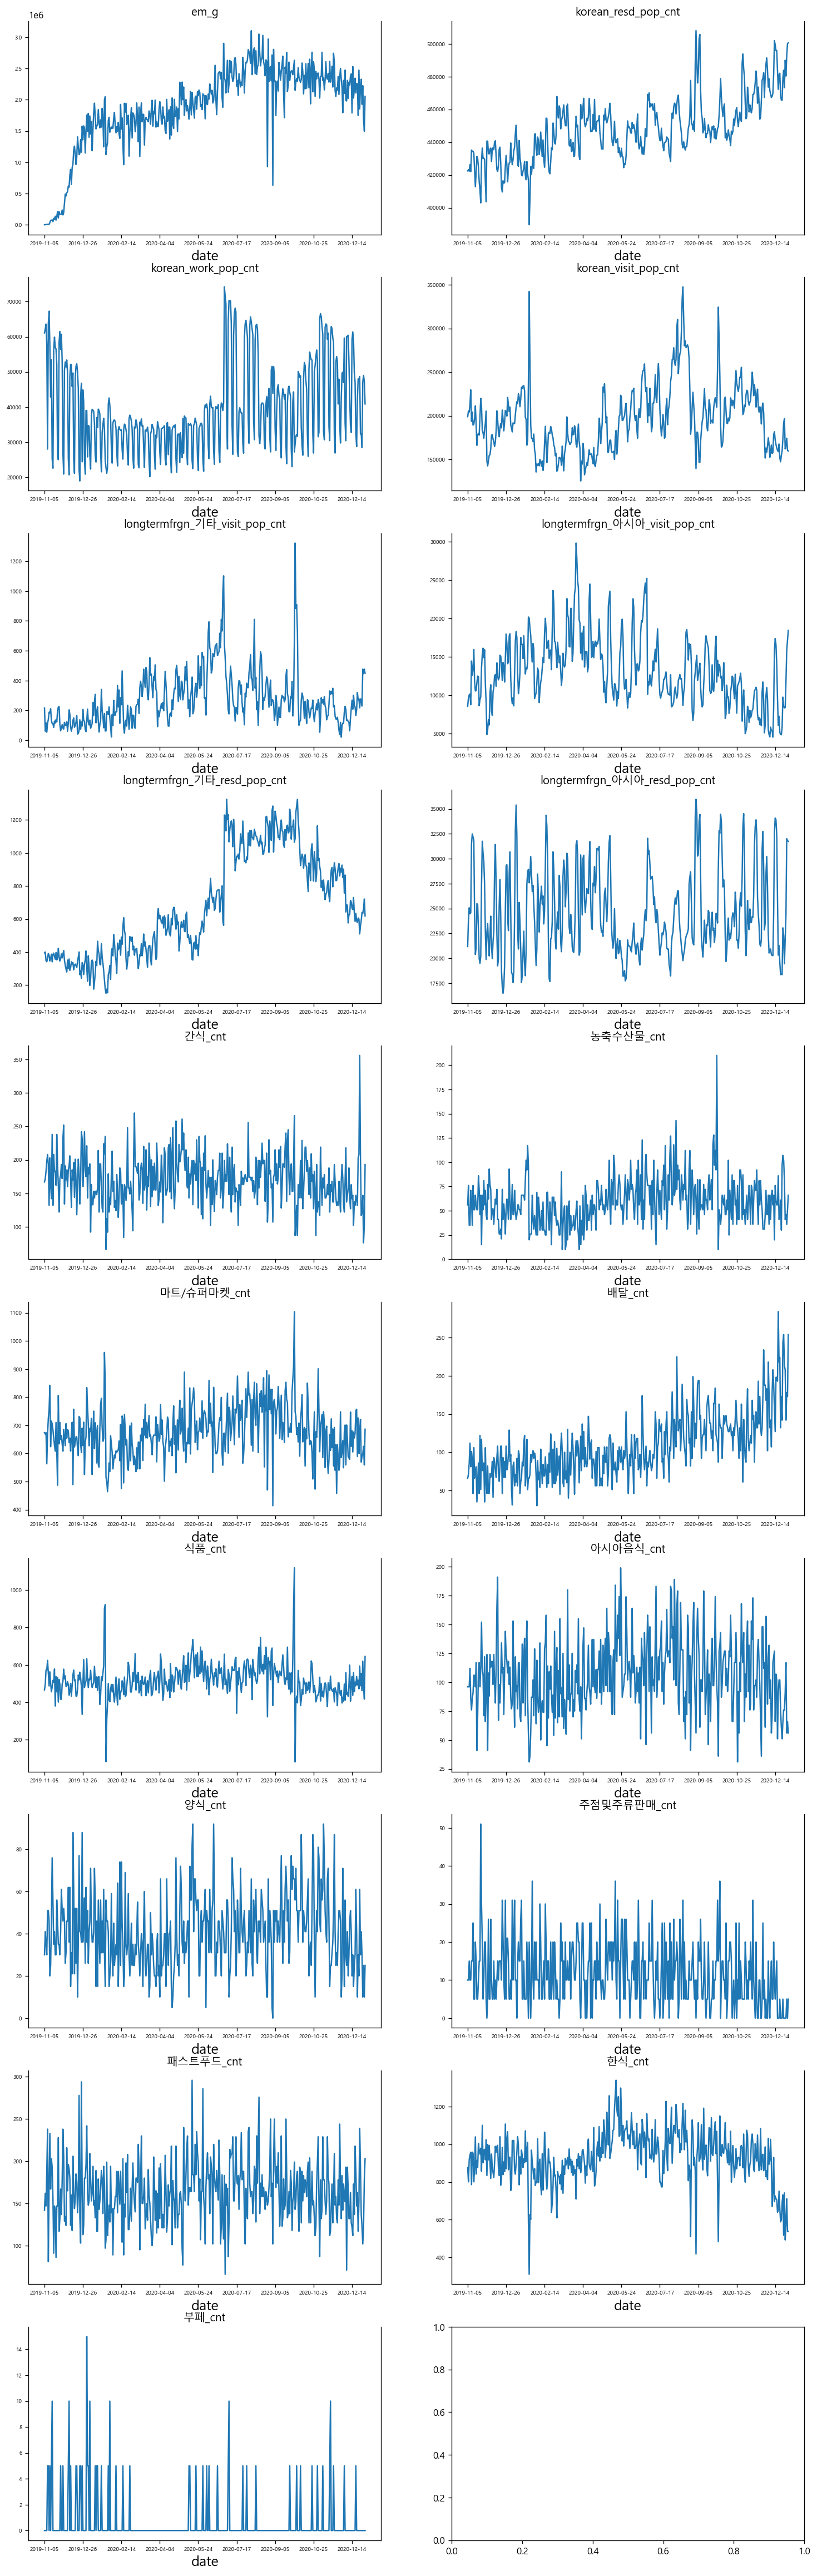

In [12]:
# Plot
fig, axes = plt.subplots(nrows=10, ncols=2, dpi=120, figsize=(15,50))
for i, ax in enumerate(axes.flatten()):
    x = 한림읍_train['base_date']
    data = 한림읍_train[한림읍_train.columns[i+2]]
    ax.plot(x, data)
    ax.set_title(한림읍_train.columns[i+2])
    ax.set_xlabel('date', fontsize = 15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

In [13]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc_한림읍 = MinMaxScaler(feature_range = (0, 1))
train_한림읍_inf_scaled = sc_한림읍.fit_transform(train_한림읍_inf)

In [14]:
# Creating a data structure with 60 timesteps and 19 output
X_train = []
y_train = []
for i in range(60, 418):
    X_train.append(train_한림읍_inf_scaled[i-60:i, :])
    y_train.append(train_한림읍_inf_scaled[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(358, 60, 19)

In [15]:
!pip install tensorflow
!pip install keras
from tensorflow import keras

In [16]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [17]:
Model = Sequential()
Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 19)))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 200, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 250, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 100))
Model.add(Dropout(0.2))
Model.add(Dense(units = 19))

In [18]:
Model.compile(optimizer = 'adam', loss = 'mean_squared_error')
Model.fit(X_train, y_train, epochs = 200, batch_size = 20)

Epoch 1/200
18/18 [==============================] - 2s 94ms/step - loss: 0.0527
Epoch 2/200
18/18 [==============================] - 2s 99ms/step - loss: 0.0312
Epoch 3/200
18/18 [==============================] - 2s 98ms/step - loss: 0.0285
Epoch 4/200
18/18 [==============================] - 2s 100ms/step - loss: 0.0261
Epoch 5/200
18/18 [==============================] - 2s 102ms/step - loss: 0.0265
Epoch 6/200
18/18 [==============================] - 2s 98ms/step - loss: 0.0260
Epoch 7/200
18/18 [==============================] - 2s 103ms/step - loss: 0.0246
Epoch 8/200
18/18 [==============================] - 2s 101ms/step - loss: 0.0246
Epoch 9/200
18/18 [==============================] - 2s 101ms/step - loss: 0.0238
Epoch 10/200
18/18 [==============================] - 2s 103ms/step - loss: 0.0229
Epoch 11/200
18/18 [==============================] - 2s 102ms/step - loss: 0.0228
Epoch 12/200
18/18 [==============================] - 2s 97ms/step - loss: 0.0220
Epoch 13/200
18/18

18/18 [==============================] - 2s 105ms/step - loss: 0.0143
Epoch 101/200
18/18 [==============================] - 2s 102ms/step - loss: 0.0144
Epoch 102/200
18/18 [==============================] - 2s 104ms/step - loss: 0.0145
Epoch 103/200
18/18 [==============================] - 2s 102ms/step - loss: 0.0140
Epoch 104/200
18/18 [==============================] - 2s 104ms/step - loss: 0.0142
Epoch 105/200
18/18 [==============================] - 2s 103ms/step - loss: 0.0140
Epoch 106/200
18/18 [==============================] - 2s 101ms/step - loss: 0.0147
Epoch 107/200
18/18 [==============================] - 2s 101ms/step - loss: 0.0144
Epoch 108/200
18/18 [==============================] - 2s 101ms/step - loss: 0.0143
Epoch 109/200
18/18 [==============================] - 2s 102ms/step - loss: 0.0137
Epoch 110/200
18/18 [==============================] - 2s 102ms/step - loss: 0.0138
Epoch 111/200
18/18 [==============================] - 2s 102ms/step - loss: 0.0136
Epoch 

18/18 [==============================] - 2s 100ms/step - loss: 0.0083
Epoch 198/200
18/18 [==============================] - 2s 98ms/step - loss: 0.0086
Epoch 199/200
18/18 [==============================] - 2s 101ms/step - loss: 0.0086
Epoch 200/200
18/18 [==============================] - 2s 104ms/step - loss: 0.0083


In [19]:
# Getting the predicted value
한림읍_total = pd.concat((한림읍_train, 한림읍_test), axis = 0).drop(['base_date', 'emd_nm'], axis=1)
inputs = 한림읍_total[len(한림읍_total) - len(한림읍_test) - 60:].values
inputs = sc_한림읍.transform(inputs)
print(len(inputs))

241


In [20]:
X_test = []
for i in range(60, 241):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 10))
pred_inf = Model.predict(X_test)
pred_inf = sc_한림읍.inverse_transform(pred_inf)
X_test.shape

(181, 60, 19)

IndexError: index 21 is out of bounds for axis 0 with size 21

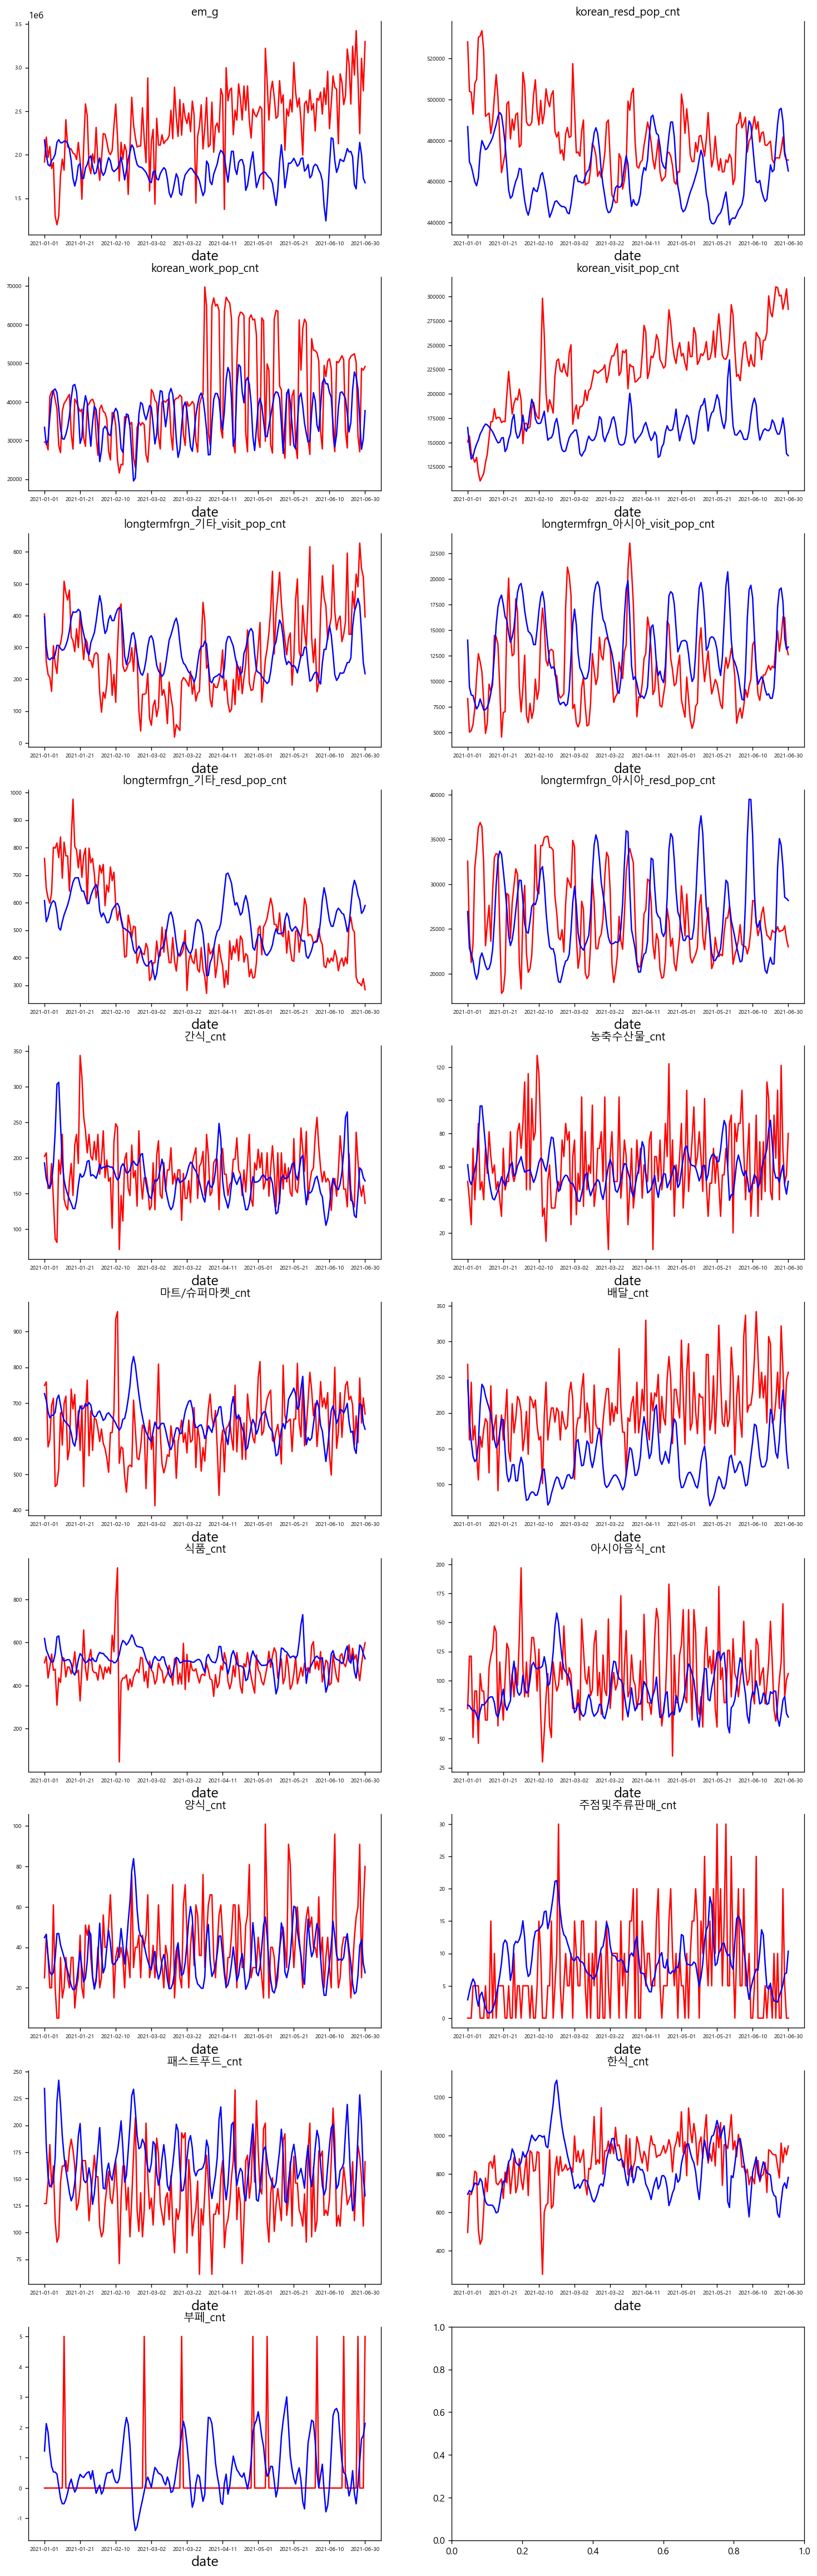

In [23]:
# Plot
fig2, axes = plt.subplots(nrows=10, ncols=2, dpi=120, figsize=(15,50))
for i, ax in enumerate(axes.flatten()):
    x = 한림읍_test['base_date']
    data = 한림읍_test[한림읍_test.columns[i+2]]
    data2 = pred_inf[:,i]
    ax.plot(x, data, color = 'red', label = 'Real')
    ax.plot(x, data2, color = 'blue', label = 'Predict')
    ax.set_title(한림읍_test.columns[i+2])
    ax.set_xlabel('date', fontsize = 15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

In [24]:
def root_MSE(x,y):
    root = 0
    for i in range(0,len(x)):
        root += (list(x)[i]-y[i])**2
    root = math.sqrt(root / len(x))
    return root

In [25]:
for i in range(0, 19):
    data = 한림읍_test[한림읍_test.columns[i+2]]
    data2 = pred_inf[:,i]
    print("RMSE of", 한림읍_test.columns[i+2], ":", root_MSE(data, data2))

RMSE of em_g : 688847.7409740045
RMSE of korean_resd_pop_cnt : 29067.62605505025
RMSE of korean_work_pop_cnt : 12695.471017515176
RMSE of korean_visit_pop_cnt : 72119.27874158007
RMSE of longtermfrgn_기타_visit_pop_cnt : 140.9202451990201
RMSE of longtermfrgn_아시아_visit_pop_cnt : 5023.762855282081
RMSE of longtermfrgn_기타_resd_pop_cnt : 142.87043212784357
RMSE of longtermfrgn_아시아_resd_pop_cnt : 6405.3217417662245
RMSE of 간식_cnt : 50.562346548995556
RMSE of 농축수산물_cnt : 26.25492354827676
RMSE of 마트/슈퍼마켓_cnt : 105.1757229362458
RMSE of 배달_cnt : 93.52143398113252
RMSE of 식품_cnt : 110.24239425855222
RMSE of 아시아음식_cnt : 36.934075090417764
RMSE of 양식_cnt : 20.650406950051348
RMSE of 주점및주류판매_cnt : 7.851432459129132
RMSE of 패스트푸드_cnt : 48.87002546805051
RMSE of 한식_cnt : 187.54167243200882
RMSE of 부페_cnt : 1.4281389843862613


In [26]:
# Getting the predicted value
inputs = 한림읍_total[len(한림읍_total) - 60:].values
inputs = sc_한림읍.transform(inputs)
Y_predict = []
for i in range(0, 62):
    X_predict = []
    X_predict.append(inputs[i:60+i, :])
    X_predict = np.array(X_predict)
    pred = Model.predict(X_predict)
    inputs = np.concatenate([inputs, pred]) # 61, 19
    pred = sc_한림읍.inverse_transform(pred)
    Y_predict.append(pred)

In [27]:
Y_predict = np.reshape(Y_predict, (62,19))
Y_predict = pd.DataFrame(Y_predict)
Y_predict

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1799469.875,458285.31250,41976.835938,143764.140625,216.229599,12822.521484,583.509827,26263.310547,165.965057,59.054279,652.471069,120.251137,513.939880,76.591980,29.963186,13.530919,144.042267,856.318481,2.376898
1,1851511.625,454913.03125,42004.000000,147467.906250,217.342270,12074.726562,554.349731,24658.294922,167.663925,65.005592,675.808960,125.516518,506.037628,85.739792,34.897186,12.657830,158.451447,887.474670,2.067112
2,1862983.750,453759.03125,38377.847656,150646.390625,215.323242,11067.134766,518.296570,23324.429688,173.999405,66.507607,692.010681,133.558899,506.821472,95.836563,41.340473,10.788931,171.730011,904.794800,1.505305
3,1859412.500,453785.06250,33402.714844,151635.531250,214.476852,9954.073242,489.812195,22280.964844,179.034210,63.332836,695.355835,139.516541,512.070374,103.962654,45.715302,9.712459,178.804016,903.080017,0.785346
4,1825291.625,454147.43750,31604.843750,147032.359375,207.865601,9060.420898,469.386261,21831.134766,176.122330,59.746677,674.322571,138.258682,515.287231,102.936829,43.574375,8.639477,174.724640,865.620850,0.228705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1932257.875,434299.03125,35384.949219,183644.875000,400.479248,12996.771484,523.812195,20865.798828,159.588837,62.058758,665.842346,100.435532,546.325317,93.801003,47.494633,13.546352,163.370300,1007.662598,0.904277
58,1942200.625,434156.21875,33638.281250,184371.796875,417.192688,12652.903320,530.433838,20944.816406,156.981064,68.065140,682.590210,107.431244,565.854431,110.694756,49.467579,16.598610,180.020218,1052.339600,1.390607
59,1950067.500,437911.06250,27997.238281,185186.062500,442.516968,12522.979492,498.814545,20975.707031,159.827530,64.675964,707.245728,112.059021,584.835449,129.352493,54.184681,20.013012,194.364090,1087.202393,1.269557
60,1917767.000,445150.53125,23774.658203,179466.812500,415.425873,11851.452148,487.771179,21260.466797,168.498703,55.750389,721.189941,103.158646,580.862732,130.625900,56.133469,20.395435,184.810410,1070.573486,0.454349


In [28]:
Y_predict.rename(columns = {Y_predict.columns[0]:"em_g", Y_predict.columns[1]:"korean_resd_pop_cnt", Y_predict.columns[2]:"korean_work_pop_cnt",
                            Y_predict.columns[3]:"korean_visit_pop_cnt", Y_predict.columns[4]:"longtermfrgn_기타_visit_pop_cnt", Y_predict.columns[5]:"longtermfrgn_아시아_visit_pop_cnt",
                            Y_predict.columns[6]:"longtermfrgn_기타_resd_pop_cnt", Y_predict.columns[7]:"longtermfrgn_아시아_resd_pop_cnt", Y_predict.columns[8]:"간식_cnt", Y_predict.columns[9]:"농축수산물_cnt",
                            Y_predict.columns[10]:"마트/슈퍼마켓_cnt", Y_predict.columns[11]:"배달_cnt", Y_predict.columns[12]:"식품_cnt", Y_predict.columns[13]:"아시아음식_cnt",
                            Y_predict.columns[14]:"양식_cnt", Y_predict.columns[15]:"주점및주류판매_cnt", Y_predict.columns[16]:"패스트푸드_cnt", Y_predict.columns[17]:"한식_cnt",
                            Y_predict.columns[18]:"부페_cnt"}, inplace=True)

In [29]:
한림읍_predict = pd.read_csv("한림읍_pred.csv")

In [30]:
한림읍_predict = pd.concat((한림읍_predict, Y_predict), axis = 1)

In [31]:
한림읍_predict

,base_date,emd_nm,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,...,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
0,2021-07-01,한림읍,1799469.875,458285.31250,41976.835938,143764.140625,216.229599,12822.521484,583.509827,26263.310547,...,59.054279,652.471069,120.251137,513.939880,76.591980,29.963186,13.530919,144.042267,856.318481,2.376898
1,2021-07-02,한림읍,1851511.625,454913.03125,42004.000000,147467.906250,217.342270,12074.726562,554.349731,24658.294922,...,65.005592,675.808960,125.516518,506.037628,85.739792,34.897186,12.657830,158.451447,887.474670,2.067112
2,2021-07-03,한림읍,1862983.750,453759.03125,38377.847656,150646.390625,215.323242,11067.134766,518.296570,23324.429688,...,66.507607,692.010681,133.558899,506.821472,95.836563,41.340473,10.788931,171.730011,904.794800,1.505305
3,2021-07-04,한림읍,1859412.500,453785.06250,33402.714844,151635.531250,214.476852,9954.073242,489.812195,22280.964844,...,63.332836,695.355835,139.516541,512.070374,103.962654,45.715302,9.712459,178.804016,903.080017,0.785346
4,2021-07-05,한림읍,1825291.625,454147.43750,31604.843750,147032.359375,207.865601,9060.420898,469.386261,21831.134766,...,59.746677,674.322571,138.258682,515.287231,102.936829,43.574375,8.639477,174.724640,865.620850,0.228705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-08-27,한림읍,1932257.875,434299.03125,35384.949219,183644.875000,400.479248,12996.771484,523.812195,20865.798828,...,62.058758,665.842346,100.435532,546.325317,93.801003,47.494633,13.546352,163.370300,1007.662598,0.904277
58,2021-08-28,한림읍,1942200.625,434156.21875,33638.281250,184371.796875,417.192688,12652.903320,530.433838,20944.816406,...,68.065140,682.590210,107.431244,565.854431,110.694756,49.467579,16.598610,180.020218,1052.339600,1.390607
59,2021-08-29,한림읍,1950067.500,437911.06250,27997.238281,185186.062500,442.516968,12522.979492,498.814545,20975.707031,...,64.675964,707.245728,112.059021,584.835449,129.352493,54.184681,20.013012,194.364090,1087.202393,1.269557
60,2021-08-30,한림읍,1917767.000,445150.53125,23774.658203,179466.812500,415.425873,11851.452148,487.771179,21260.466797,...,55.750389,721.189941,103.158646,580.862732,130.625900,56.133469,20.395435,184.810410,1070.573486,0.454349


In [32]:
한림읍_predict.to_csv('한림읍_predict.csv', encoding = 'utf-8-sig')

IndexError: index 21 is out of bounds for axis 0 with size 21

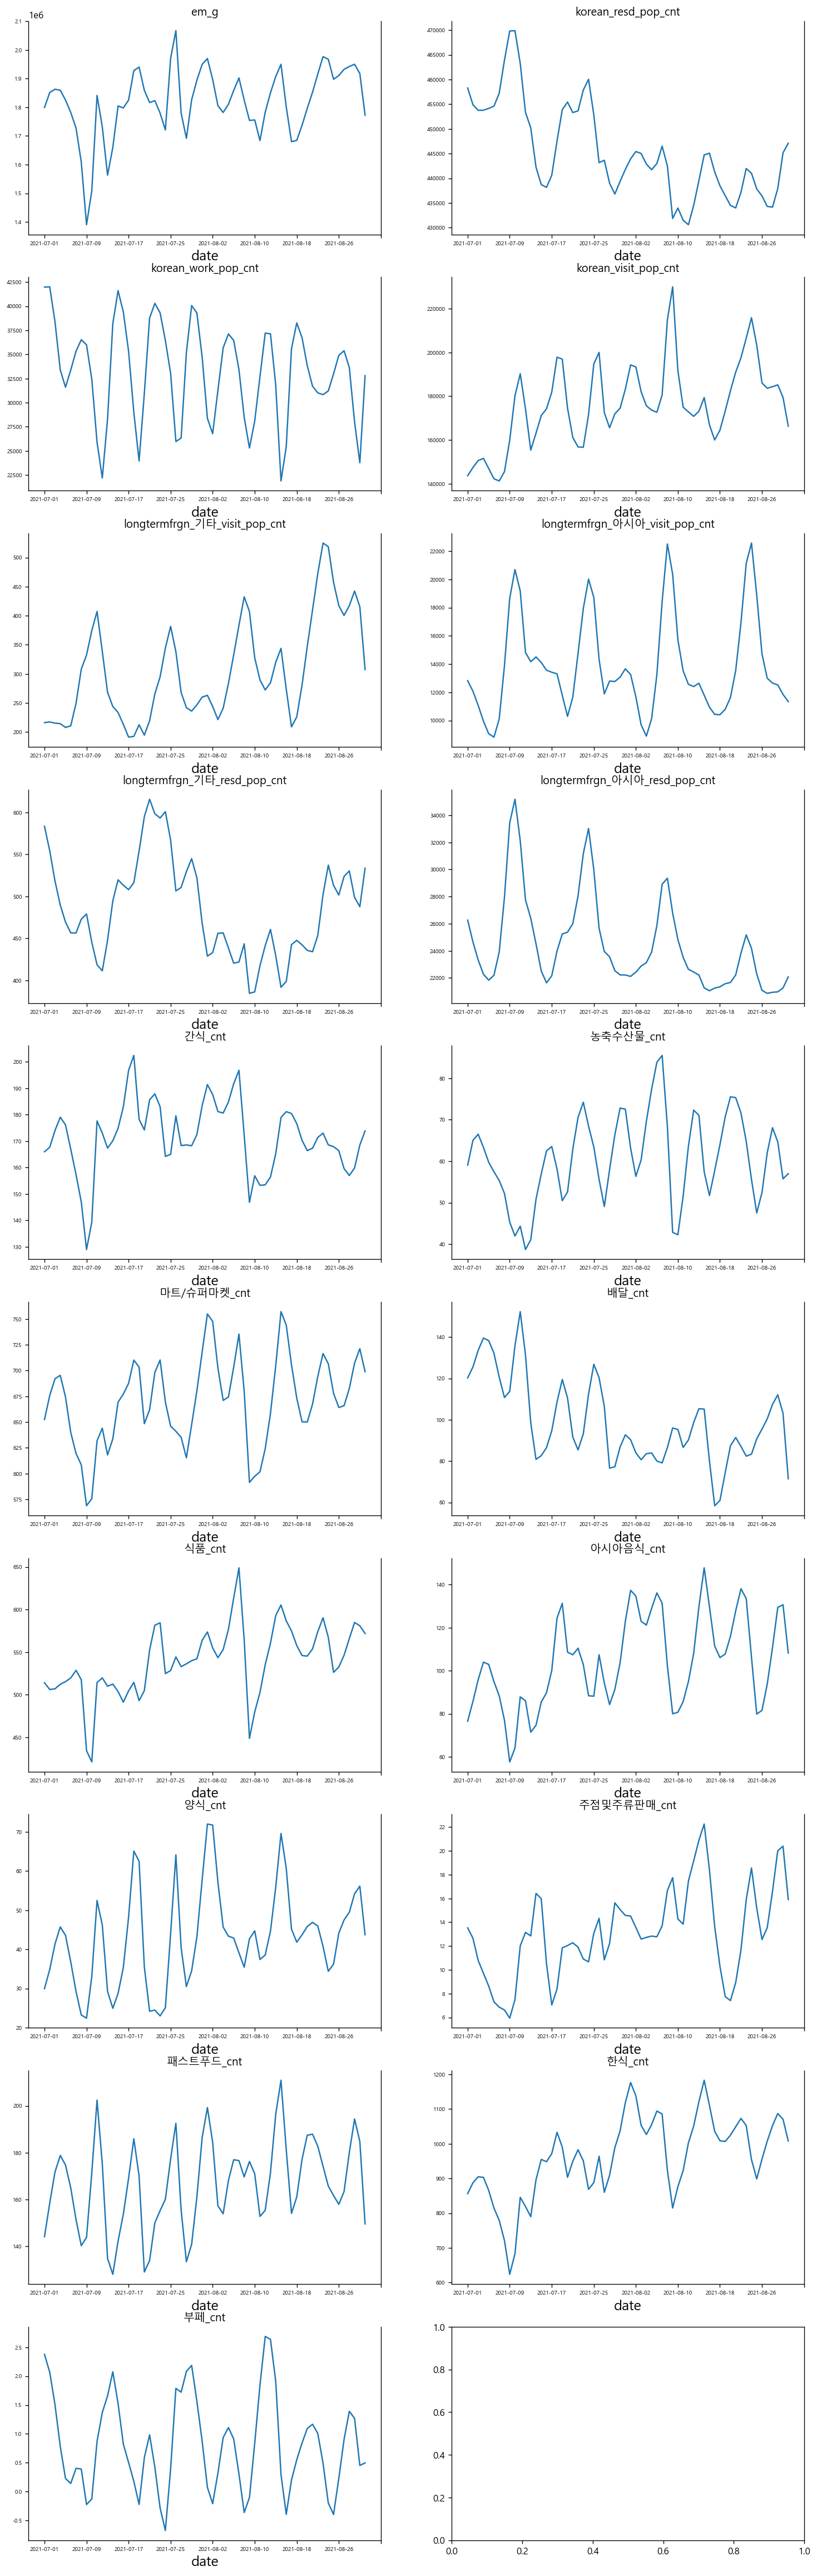

In [33]:
# Plot
fig, axes = plt.subplots(nrows=10, ncols=2, dpi=120, figsize=(15,50))
for i, ax in enumerate(axes.flatten()):
    x = 한림읍_predict['base_date']
    data = 한림읍_predict[한림읍_predict.columns[i+2]]
    ax.plot(x, data)
    ax.set_title(한림읍_predict.columns[i+2])
    ax.set_xlabel('date', fontsize = 15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()